## SED stats

- Read SYNAGE++ results
- Compute physical properties


In [1]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable


fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

aut = 'Fg'
coreAut = 'Pbcorr'

names = ['ToT'+aut,'ELobe'+aut,'WLobe'+aut,'coreBeam'+coreAut,'coreOut'+coreAut]

ToTDir = rootDir+'ToT/'
ELobeDir = rootDir+'ELobe/'
WLobeDir = rootDir+'WLobe/'
CoreDir = rootDir+'kore/'

dirNames = [ToTDir,ELobeDir,WLobeDir,CoreDir,CoreDir]

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir


tableName = rootDir+'inTabs/inputFluxTableFg.tbl'
tableFileNames= ascii.read(tableName,format='csv')


print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


**Input flux tables**:

```
~/Projects/MFS/FornaxA/contData/ToT/ToTFluxes.tbl'
~/Projects/MFS/FornaxA/contData/ELobe/ELobeFluxes.tbl'
~/Projects/MFS/FornaxA/contData/WLobe/WLobeFluxes.tbl'
~/Projects/MFS/FornaxA/contData/Core/CoreFluxes.tbl'
```
**Input SYNAGE tables (in synOut directory)**:

```
ToTCI_point1_fit.dat
ToTCIOFF_point1_fit.dat
ToTCI.stats
ToTCIOFF.stats

ELobeCI_point1_fit.dat
ELobeCIOFF_point1_fit.dat
ELobeCI.stats
ELobeCIOFF.stats

WLobeCI_point1_fit.dat
WLobeCIOFF_point1_fit.dat
WLobeCI.stats
WLobeCIOFF.stats

```
---
\begin{equation}
	t_{\rm s}	 = 1610 \frac{B^{0.5}}{B^2+B^2_{\rm CMB}}\frac{1}{[\nu_{\rm break}(1+z)]^{1/2}]}
\end{equation}

$B$ and $B_{\rm IC} = 3.25(1+z)^2$ are the equipartition and inverse Compton magnetic fields, both measured in $\mu$Jy. $\nu_{\rm break}$ is expressed in GHz.

- $B =2.6\pm0.3\mu$Jy
- $B/B_{\rm IC} = 0.79$

if the SED is best fitted by the Continuous Injection + turn off model, it means there is a new break at high frequencies given by:

\begin{equation}
	\nu_{\rm break, high} = \nu_{\rm break}\bigg(\frac{t_s}{t_{\rm OFF}}\bigg)^2
\end{equation}

where:

\begin{equation}
	t_s=t_{\rm CI} + t_{\rm CIOFF}
\end{equation}


The East/West lobes and global profiles are best described by the CIOFF model, while both the CI model and the CIOFF model provide similar results for the SED of the core. The best-fit solution of the CIOFF model shows that the turn off time of the core is compatible with zero: 

\begin{equation}
    \frac{t_s}{t_{\rm OFF}} = 0.47^{+0.16}_{-0.48}
\end{equation}


**Equipartition magnetic field**
\begin{equation}
   H_{\perp} = 9.6\cdot10^{-12}\bigg(\frac{P_{1.4}(1+k)}{V_{\rm kpc^3}}\bigg)^{2/7}
\end{equation}

where $P$ is in $W/Hz$ and $k$ is the ratio between the energy of protons and electrons in the radio emitting region (I assume it equal to 1). $H_{\perp}$ is given in G.

\begin{equation}
   P_{1.4} = 4\pi\cdot10^{-26}\cdot D_{\rm L}^2S_{1.4}
\end{equation}


In [2]:
D_L = 20.8*1e6*3.0857e16
CoreBeam= ascii.read(CoreDir+'outTabs/coreFluxBeamPbcorr.tbl', fast_reader=False)
SBeam =CoreBeam['Integrated Flux [Jy]'][1]
CoreOut= ascii.read(CoreDir+'outTabs/coreFluxOutPbcorr.tbl', fast_reader=False)
SOut =CoreOut['Integrated Flux [Jy]'][1]
CoreELobe= ascii.read(ELobeDir+'ELFluxesFgCv.tbl', fast_reader=False)
ELobe =CoreELobe['Integrated Flux [Jy]'][1]
CoreWLobe= ascii.read(WLobeDir+'WLFluxesFgCv.tbl', fast_reader=False)
WLobe =CoreWLobe['Integrated Flux [Jy]'][1]

PCore= 4*np.pi*10e-26*np.power(D_L,2)*SBeam
POut = 4*np.pi*10e-26*np.power(D_L,2)*SOut
PELobe = 4*np.pi*10e-26*np.power(D_L,2)*ELobe
PWLobe = 4*np.pi*10e-26*np.power(D_L,2)*WLobe

print PCore
lr = 101e-3
aBeam = 18.5/2.335
bBeam = 9./2.335
cBeam = aBeam/2.335

rOut = 8
hOut = 50.

aLobe = 30.*60.
bLobe = aLobe
cLobe = aLobe
print 50.*60.*lr
print 20.*60.*lr
print 28.*60.*lr

VBeam = 4/3*np.pi*aBeam*bBeam*cBeam*np.power(lr,3)

VOut = 4/3*np.pi*rOut*rOut*hOut*np.power(lr,3)

VLobe = 4/3*np.pi*aLobe*bLobe*cLobe*np.power(lr,3)
 

B_eqBeam =9.6e-12*np.power(2*PCore/VBeam,2./7.)
B_eqOut =9.6e-12*np.power(2*POut/VOut,2./7.)
B_eqELobe = 9.6e-12*np.power(2*PELobe/VLobe,2./7.)
B_eqWLobe = 9.6e-12*np.power(2*PWLobe/VLobe,2./7.)

print B_eqBeam,B_eqOut,B_eqELobe, B_eqWLobe

5.449453246865332e+22
303.0
121.2
169.68
5.011146412577591e-05 2.2856763163136377e-05 2.789809840004195e-06 3.320196578558042e-06


In [3]:
z = 0.005871
B = np.array([B_eqELobe,B_eqELobe,B_eqWLobe,B_eqBeam,B_eqOut])*1e6
BIC = 3.25*np.power(1+z,2)
print BIC
for i in xrange(0,len(names)):

    statsCI = syn.readCIStats(dirNames[i]+'/synOut/'+names[i]+'CI.stats')
    statsCIOFF =  syn.readCIOFFStats(dirNames[i]+'/synOut/'+names[i]+'CIOFF.stats')
    
    
    tsCI = 1610.*(np.power(B[i],0.5))/(B[i]*B[i]+BIC*BIC)*np.divide(1.,np.power(statsCI['break']/1e3*(1.+z),0.5))
    tsCIsup = 1610.*(np.power(B[i],0.5))/(B[i]*B[i]+BIC*BIC)*np.divide(1.,np.power(statsCI['break_sup']/1e3*(1.+z),0.5))
    tsCIinf = 1610.*(np.power(B[i],0.5))/(B[i]*B[i]+BIC*BIC)*np.divide(1.,np.power(-statsCI['break_inf']/1e3*(1.+z),0.5))

    statsCI['ts'] = tsCI
    statsCI['ts_sup'] = tsCIsup
    statsCI['ts_inf'] = tsCIinf
        
    tsCIOFF = 1610.*(np.power(B[i],0.5))/(B[i]*B[i]+BIC*BIC)*np.divide(1.,np.power(statsCIOFF['break']/1e3*(1.+z),0.5))
    tsCIOFFsup = 1610.*(np.power(B[i],0.5))/(B[i]*B[i]+BIC*BIC)*np.divide(1.,np.power(statsCIOFF['break_sup']/1e3*(1.+z),0.5))
    tsCIOFFinf = 1610.*(np.power(B[i],0.5))/(B[i]*B[i]+BIC*BIC)*np.divide(1.,np.power(-statsCIOFF['break_inf']/1e3*(1.+z),0.5))
    
    statsCIOFF['ts'] = tsCIOFF
    statsCIOFF['ts_sup'] = tsCIOFFsup
    statsCIOFF['ts_inf'] = tsCIOFFinf
    
    tOFF = statsCIOFF['tratio']*tsCIOFF
    statsCIOFF['toff'] = tOFF
    tOFFsup = statsCIOFF['t_errsup']*tsCIOFFsup
    statsCIOFF['toff_sup'] = tOFFsup
    tOFFinf = -statsCIOFF['t_errinf']*tsCIOFFsup
    statsCIOFF['toff_inf'] = tOFFinf
    
    nuhigh = statsCIOFF['break']*np.power(1./statsCIOFF['tratio'],2)
    statsCIOFF['nuhigh'] = nuhigh
    
    #if i ==3 :
    #    statsCIOFF['t_errinf'] = 
    nuhighinf = nuhigh*np.sqrt(np.power(statsCIOFF['break_inf']/statsCIOFF['break'],2)+2*np.power(statsCIOFF['t_errinf']/statsCIOFF['tratio'],2))
    nuhighsup = nuhigh*np.sqrt(np.power(statsCIOFF['break_sup']/statsCIOFF['break'],2)+2*np.power(statsCIOFF['t_errsup']/statsCIOFF['tratio'],2))
    statsCIOFF['nuhigh_inf'] = nuhighinf
    statsCIOFF['nuhigh_sup'] = nuhighsup

    
    #flArr= ascii.read(rootDir+names[i]+'/'+names[i]+'Fluxes.tbl', fast_reader=False)
    #modCI = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CI_point1_fit.dat')
    #modCIOFF = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CIOFFCore_point1_fit.dat')

    print '''\t+---------+\n\t'''+names[i]+'''\n\t+---------+'''
    
    CI = PrettyTable(['CI', 'value'])
    for key, val in statsCI.items():
        CI.add_row([key, val])


    CIOFF = PrettyTable(['CIOFF', 'value'])
    for key, val in statsCIOFF.items():
        CIOFF.add_row([key, val])

    print CI, CIOFF

    if i == 0:
        TotStatsCI = statsCI.copy()
        TotStatsCIOFF = statsCIOFF.copy()
    elif i ==1:
        ELobeStatsCI = statsCI.copy()
        ELobeStatsCIOFF = statsCIOFF.copy()    
    elif i == 2:
        WLobeStatsCI = statsCI.copy()
        WLobeStatsCIOFF = statsCIOFF.copy()
    elif i ==3:
        CoreStatsCI = statsCI.copy()
        CoreStatsCIOFF = statsCIOFF.copy()      
    elif i ==4:
        CoreOutStatsCI = statsCI.copy()
        CoreOutStatsCIOFF = statsCIOFF.copy()  
        
print '''\t+---------+\n\t Synage results read\n\t+---------+'''


3.28827352308325
	+---------+
	ToTFg
	+---------+
+--------------+--------------------+
|      CI      |       value        |
+--------------+--------------------+
|    break     |      9190.315      |
|    chisq     |      23.30987      |
|    ts_sup    | 108.64036126580484 |
|    alpha     |     0.5987214      |
| alpha_errinf |    -0.05028129     |
| alpha_errsup |     0.01469761     |
|    chired    |      1.294993      |
|      ts      | 47.562250428713305 |
|     ndf      |        18.0        |
|  break_inf   |     -3973.232      |
|  break_sup   |      1761.46       |
|    ts_inf    |  72.336190190942   |
|     norm     |      37.43289      |
+--------------+--------------------+ +--------------+--------------------+
|    CIOFF     |       value        |
+--------------+--------------------+
|   t_errinf   |     -0.4909515     |
|   toff_sup   |  16.2618885040302  |
|    nuhigh    | 109971.83428216705 |
|    tratio    |     0.5957068      |
|   t_errsup   |     0.2328205      |


/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in divide
/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [4]:
print '\tCore  ts =\t'+str(np.round(CoreStatsCI['ts'],6))+' + '+str(np.round(CoreStatsCI['ts_sup'],6))+' - '+str(np.round(CoreStatsCI['ts_inf'],6))

print '\tCoreO ts =\t'+str(np.round(CoreOutStatsCIOFF['ts'],6))+' + '+str(np.round(CoreOutStatsCIOFF['ts_sup'],6))+' - '+str(np.round(CoreOutStatsCIOFF['ts_inf'],6))

print '\tELobe ts =\t'+str(np.round(ELobeStatsCIOFF['ts'],3))+' + '+str(np.round(ELobeStatsCIOFF['ts_sup'],3))+' - '+str(np.round(ELobeStatsCIOFF['ts_inf'],3))

print '\tWLobe ts =\t'+str(np.round(WLobeStatsCIOFF['ts'],3))+' + '+str(np.round(WLobeStatsCIOFF['ts_sup'],3))+' - '+str(np.round(WLobeStatsCIOFF['ts_inf'],3))+'\n'

print '\tCoreO toff =\t'+str(np.round(CoreOutStatsCIOFF['toff'],6))+' + '+str(np.round(CoreOutStatsCIOFF['toff_sup'],6))+' - '+str(np.round(CoreOutStatsCIOFF['toff_inf'],6))

print '\tELobe toff =\t'+str(np.round(ELobeStatsCIOFF['toff'],3))+' + '+str(np.round(ELobeStatsCIOFF['toff_sup'],3))+' - '+str(np.round(ELobeStatsCIOFF['toff_inf'],3))

print '\tWLobe toff =\t'+str(np.round(WLobeStatsCIOFF['toff'],3))+' + '+str(np.round(WLobeStatsCIOFF['toff_sup'],3))+' - '+str(np.round(WLobeStatsCIOFF['toff_inf'],3))+'\n'

print '\tCoreO nuHigh =\t'+str(np.round(CoreOutStatsCIOFF['nuhigh']/1e3,6))+' + '+str(np.round(CoreOutStatsCIOFF['nuhigh_sup']/1e3,3))+' - '+str(np.round(CoreOutStatsCIOFF['nuhigh_inf']/1e3,6))
print '\tELobe nuHigh =\t'+str(np.round(ELobeStatsCIOFF['nuhigh']/1e3,6))+' + '+str(np.round(ELobeStatsCIOFF['nuhigh_sup']/1e3,3))+' - '+str(np.round(ELobeStatsCIOFF['nuhigh_inf']/1e3,6))
print '\tWLobe nuHigh =\t'+str(np.round(WLobeStatsCIOFF['nuhigh']/1e3,6))+' + '+str(np.round(WLobeStatsCIOFF['nuhigh_sup']/1e3,3))+' - '+str(np.round(WLobeStatsCIOFF['nuhigh_inf']/1e3,6))+'\n'


print '\tELobe tratio =\t'+str(np.round(ELobeStatsCIOFF['tratio'],3))+' + '+str(np.round(ELobeStatsCIOFF['t_errsup'],3))+' - '+str(np.round(-ELobeStatsCIOFF['t_errinf'],3))
print '\tWLobe tratio =\t'+str(np.round(WLobeStatsCIOFF['tratio'],3))+' + '+str(np.round(WLobeStatsCIOFF['t_errsup'],3))+' - '+str(np.round(-WLobeStatsCIOFF['t_errinf'],3))
print '\tCoreO tratio =\t'+str(np.round(CoreOutStatsCIOFF['tratio'],3))+' + '+str(np.round(CoreOutStatsCIOFF['t_errsup'],3))+' - '+str(np.round(-CoreOutStatsCIOFF['t_errinf'],3))+'\n'

	Core  ts =	0.284979 + inf - 0.649231
	CoreO ts =	4.112411 + 9.37983 - 6.05625
	ELobe ts =	25.322 + 51.21 - 27.791
	WLobe ts =	25.107 + 65.175 - 29.089

	CoreO toff =	3.66519 + 0.0 - 2.798861
	ELobe toff =	12.371 + 4.19 - 21.542
	WLobe toff =	11.345 + 7.027 - 21.845

	CoreO nuHigh =	15.419798 + 2.964 - 10.190921
	ELobe nuHigh =	135.852369 + 46.25 - 200.226388
	WLobe nuHigh =	139.408974 + 51.392 - 179.36088

	ELobe tratio =	0.489 + 0.082 - 0.421
	WLobe tratio =	0.452 + 0.108 - 0.335
	CoreO tratio =	0.891 + 0.0 - 0.298



#### print '\t P(lobes) / P(core)=\t'+str((PWLobe+PELobe)/PCore)
print '\t P(jet) / P(core)=\t'+str((POut)/PCore)



In [88]:
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_pix(tot, mod,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    #ax1.set_ylim([1e-3,2e3])
    #ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(mod[0] - 5e5)).argmin()
    idx_min = (np.abs(mod[0] - 30)).argmin()

    
    ax1.plot(mod[0][idx_min:idx_max],mod[1][idx_min:idx_max],lw=3, marker=' ',color=color_plot[1], 
             linestyle=':',label='JP',alpha=0.5)

    
    totplot1 = ax1.errorbar(tot['col4'],tot['col5'], yerr=tot['col6'],
             marker='o', color='red', linestyle=' ',label='Pix 42,42',capsize=6,markersize=10) 

    #totplot[-1][0].set_linestyle('--')
    #totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


Lanz et al 2010 assume an approximate buoyancy time of $0.6c_s$ (Churazov et al. 2001). Hence, $v_{buoy} = 270$ km/s. From which an estimate age of the lobes is given by:

\begin{equation}
\frac{LAS}{2} \cdot 1/v_{\rm buoy} = 0.4 Gyr = 400 Myr
\end{equation}

where $LAS =$ largest angular scale of the system $= 260 kpc = $ total extent of lobes + distance between them.


another approximation is assume that the lobes expanded adiabatically at the speed of sound. This can be a fraction of c. Varying the expansion speed one can estimate the age of the lobes.


In [89]:
C = 2.99792458e5 #km/s
kb = 1.38064852e-23 
T=2e7

mh = 1.6737236e-27
Cs = np.sqrt(2.*kb*T/mh)/1e3

print Cs
LAS = 100*2. #kpc

LAS = LAS*1e3*3.0857e13 #km

vBuoy =270. #km/s
vBuoySup =800. #km/s

vadSup = 0.012*C 
vadInf = 0.001*C 

#print Cs , vBuoy/0.6

tadSup = LAS/(2.*Cs)/(3600.*24*365.25)/1e6 
tadInf = LAS/(2.*Cs)/(3600.*24*365.25)/1e6 

print tadSup, tadInf

tBuoyL = LAS/(2.*vBuoy)/(3600.*24*365.25)/1e6
tBuoyInfL = LAS/(2.*vBuoySup)/(3600.*24*365.25)/1e6

LASOut=12.
tBuoyOut = LASOut/(2.*vBuoy)/(3600.*24*365.25)/1e6
tBuoyInfOut = LASOut/(2.*vBuoySup)/(3600.*24*365.25)/1e6


574.4201837648533
170.2237061498812 170.2237061498812


In [90]:
#-------------------------------------------------#
# Plot 
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms


def tSyncOverTbuoy(b,ts,tsErrSup,tsErrInf,tBuoy,tBuoySup,tBuoyInf,outfile):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Magnetic Field [$\mu$G]')
    ax1.set_ylabel(r'Source Age [Myr]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-1,2e3])
    ax1.set_xlim([0.2,5e2])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
#    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
#    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    ax1.plot(b,ts,lw=3, marker=' ', color='red', linestyle='-',label=r't$_{\rm sync}$',alpha=1)

    ax1.fill_between(b, tsErrInf, tsErrSup, facecolor='red', alpha=0.3)
    
    ax1.plot(b,tBuoy,lw=3, marker=' ', color='blue', linestyle='--',label=r't$_{\rm buoy}$',alpha=1)
 
    ax1.fill_between(b, tBuoyInf, tBuoySup, facecolor='blue', alpha=0.3)

    legend = plt.legend(loc=3, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(outfile,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


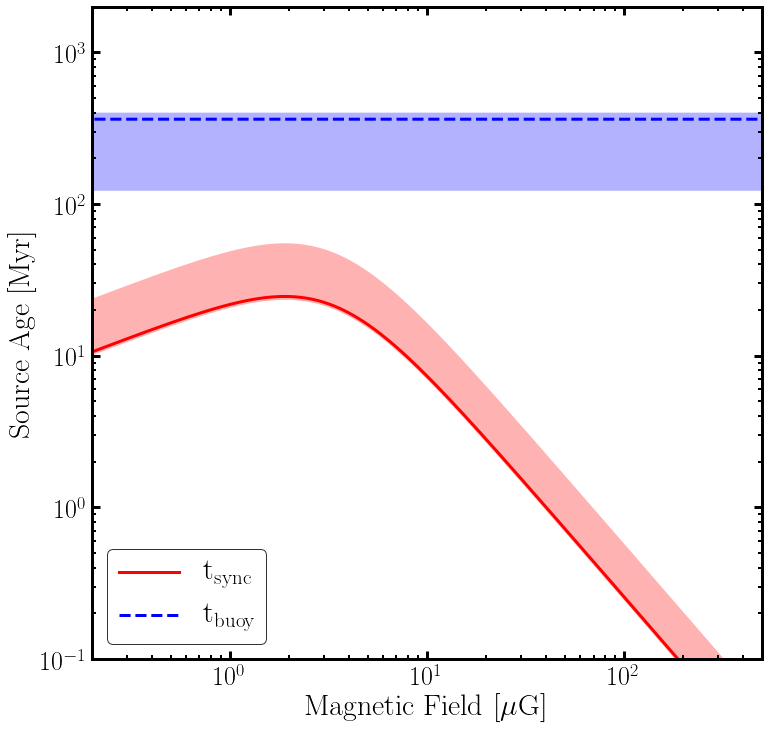

In [91]:
B = np.linspace(1e-2,1e3,1e4)
BIC = 3.25*np.power(1+z,2)

stats =  syn.readCIOFFStats(dirNames[0]+'/synOut/'+names[0]+'CIOFF.stats')
    

ts = 1610.*(np.power(B,0.5))/(B*B+BIC*BIC)*np.divide(1.,np.power(stats['break']/1e3*(1.+z),0.5))
tsInf = 1610.*(np.power(B,0.5))/(B*B+BIC*BIC)*np.divide(1.,np.power((stats['break']/1e3+stats['break_sup']/1e3)*(1.+z),0.5))
tsSup = 1610.*(np.power(B,0.5))/(B*B+BIC*BIC)*np.divide(1.,np.power((stats['break']/1e3+stats['break_inf']/1e3)*(1.+z),0.5))


tBuoy = np.zeros(ts.shape)+tBuoyL
tBuoySup = np.zeros(ts.shape)+400.
tBuoyInf = np.zeros(ts.shape)+tBuoyInfL

outplot=rootDir+'tSyncOverTbuoyLobes.png'
tSyncOverTbuoy(B,ts,tsSup,tsInf,tBuoy,tBuoySup,tBuoyInf,outplot)

/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


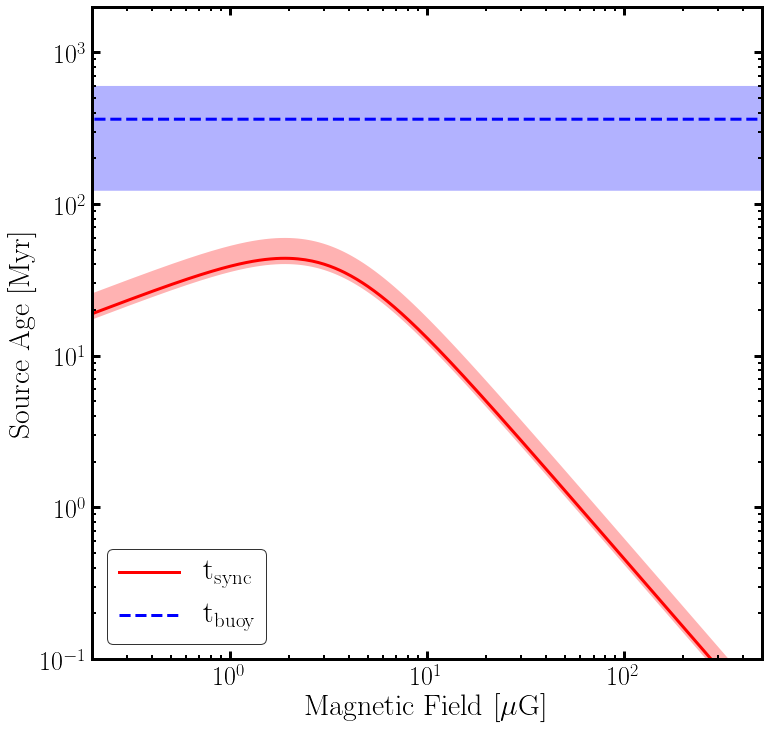

In [92]:

B = np.linspace(1e-2,1e3,1e4)
BIC = 3.25*np.power(1+z,2)

stats =  syn.readCIOFFStats(dirNames[4]+'/synOut/'+names[4]+'CIOFF.stats')
    

ts = 1610.*(np.power(B,0.5))/(B*B+BIC*BIC)*np.divide(1.,np.power(stats['break']/1e3*(1.+z),0.5))
tsInf = 1610.*(np.power(B,0.5))/(B*B+BIC*BIC)*np.divide(1.,np.power((stats['break']/1e3+stats['break_sup']/1e3)*(1.+z),0.5))
tsSup = 1610.*(np.power(B,0.5))/(B*B+BIC*BIC)*np.divide(1.,np.power((stats['break']/1e3+stats['break_inf']/1e3)*(1.+z),0.5))


tBuoy = np.zeros(ts.shape)+tBuoy
tBuoySup = np.zeros(ts.shape)+600
tBuoyInf = np.zeros(ts.shape)+tBuoyInf

outplot=rootDir+'tSyncOverTbuoyOut.png'
tSyncOverTbuoy(B,ts,tsSup,tsInf,tBuoy,tBuoySup,tBuoyInf,outplot)